<a href="https://colab.research.google.com/github/astrapi69/DroidBallet/blob/master/DLG_D2_LC0_ForwardBackward_pass_OptionalDEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><a target="_blank" href="https://academy.constructor.org/"><img src="https://jobtracker.ai/static/media/constructor_academy_colour.b86fa87f.png" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center>Constructor Academy, 2024</center>


# Backpropagation From Scratch

In [ ]:
import numpy as np

Let's start with the definition of:
- helper functions
- initial parameters
- weights, etc.

First, let's introduce an activation function. In our case we will use `sigmoid` as a simplest one available.


In [ ]:
# define the sigmoid function
def sigmoid(x, deriv = False):
    if(deriv == True):
        return sigmoid(x)*(1-sigmoid(x))
    return 1/(1+np.exp(-x))

sigmoid(3, deriv = False)

0.9525741268224334

In [ ]:
sigmoid(3, deriv = True)

0.045176659730912

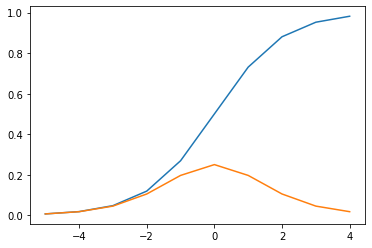

In [ ]:
# visualize sigmoid function
import matplotlib.pyplot as plt

plt.plot(np.arange(-5,5),sigmoid(np.arange(-5,5)))
plt.plot(np.arange(-5,5),sigmoid(np.arange(-5,5), deriv = True))
None

In [ ]:
# choose a random seed for reproducible results
np.random.seed(1)

# learning rate
learning_rate = .1

# number of nodes in the hidden layer
num_hidden = 3

In [ ]:
# inputs
# question - how many features?

X = np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
])
X

array([[0, 0, 1],
       [1, 1, 1],
       [1, 0, 1],
       [0, 1, 1]])

In [ ]:
# outputs
y = np.array([[0], [1], [1], [0]])
y

array([[0],
       [1],
       [1],
       [0]])

In [ ]:
y.shape[1]

1

In [ ]:
# initialize weights randomly with mean 0 and range (-1, 1)
# don't consider bias for simplicity

hidden_weights = 2*np.random.random((X.shape[1], num_hidden)) - 1
output_weights = 2*np.random.random((num_hidden, y.shape[1])) - 1

In [ ]:
print(f"Weights for the hidden layer \n {hidden_weights} \n")
print(f"Weights for the output layer \n {output_weights}")

Weights for the hidden layer 
 [[-0.16595599  0.44064899 -0.99977125]
 [-0.39533485 -0.70648822 -0.81532281]
 [-0.62747958 -0.30887855 -0.20646505]] 

Weights for the output layer 
 [[ 0.07763347]
 [-0.16161097]
 [ 0.370439  ]]


## Forward pass
<center> <img src="https://drive.google.com/uc?export=view&id=1D3pxD1nnxVwi57U1pqfO206dgjTtRaze" width=800/> </center>

$$\mathbf{Z_h} =\mathbf{X\cdot W_h} + \mathbf{b}$$
$$\mathbf{H} = \sigma(\mathbf{Z_h}) = \frac{1}{1+e^{\mathbf{-Z_h}}}$$

$$\mathbf{\hat y} =  \mathbf{Z_o} = \mathbf{H}\cdot \mathbf{W_o} + \mathbf{b_o}$$

In [ ]:
# calculate outputs for the hidden layer (2nd layer)
Zh = np.dot(X, hidden_weights) # 4x3, 3x3 => 4X3
Zh

array([[-0.62747958, -0.30887855, -0.20646505],
       [-1.18877042, -0.57471778, -2.02155911],
       [-0.79343557,  0.13177044, -1.2062363 ],
       [-1.02281443, -1.01536676, -1.02178786]])

In [ ]:
hidden_layer_outputs = sigmoid(Zh)
hidden_layer_outputs

array([[0.34808226, 0.4233885 , 0.44856632],
       [0.23347892, 0.36014894, 0.11695787],
       [0.31143146, 0.53289503, 0.23036767],
       [0.26447955, 0.26593088, 0.26467929]])

In [ ]:
# calculate outputs for the output layer (3d layer)

output_layer_outputs = np.dot(hidden_layer_outputs, output_weights) # dimensions?
output_layer_outputs

array([[0.12476506],
       [0.00324752],
       [0.02339299],
       [0.07560265]])

In [ ]:
y

array([[0],
       [1],
       [1],
       [0]])

## Backward pass


The goals of backpropagation are straightforward: adjust each weight in the network in proportion to how much it contributes to overall error. If we iteratively reduce each weight’s error, eventually we’ll have a series of weights that produce good predictions.

We first calculate the output layer error and pass the result to the hidden layer before it. After calculating the hidden layer error, we pass its error value back to the previous hidden layer before it. And so on and so forth. As we move back through the network we calculate the derivative of cost with respect that layer’s weights. This resulting derivative tells us in which direction to adjust our weights to reduce overall cost.

**Note**: The term *layer error* refers to the derivative of cost with respect to a layer’s *input*.   
It answers the question: how does the *cost function output* change when the *input* to that layer changes?

To calculate *output layer error* we need to find the derivative of cost with respect to the output layer weights, $W_o$. It answers the question - how are the final layer's weights impacting overall error in the network? Let's consider the following cost function (MSE):

$$C = \frac12(\hat y - y)^2$$

The derivative is then using chain rule is:   
For the *final layer's error term*: $E_o = C^\prime (Z_o (H,W_o)) = (\hat y - y) \cdot H$;   
For the *hidden layer's error term*: $E_{h} = C^{\prime}\left(Z_{h} (X, W_h) \right)=(\hat{y}-y) \cdot W_{o} \cdot \sigma^{\prime}\left(Z_{h}\right) \cdot X$

We will separate these expressions above for the sake of simplicity of computations, adding $H$ and $X$ later. So, what we have now:

- For the final layer's error term: $$E_o = (\hat y - y) $$  

- For the hidden layer's error term:
$$
E_{h} =(\hat{y}-y) \cdot W_{o} \cdot \sigma^{\prime}\left(Z_{h}\right)
$$

Next we can swap in the $E_{o}$ term above to avoid duplication and create a new simplified equation for Hidden layer error:

$$
E_{h}=E_{o} \cdot W_{o} \cdot \sigma^{\prime}\left(Z_{h}\right)
$$

This formula is at the core of back propagation. We calculate the current layer's error, and pass it back to the previous layer, continuing the process until we arrive at our first hidden layer. Along the way we update the weights using the derivative of cost with respect to each weight.

In [ ]:
# output layer error term
output_error = output_layer_outputs - y
output_error

array([[ 0.12476506],
       [-0.99675248],
       [-0.97660701],
       [ 0.07560265]])

In [ ]:
#sigmoid(Zh, deriv = True)

In [ ]:
# hidden layer error term
hidden_error = sigmoid(Zh, deriv = True) * np.dot(output_error, output_weights.T)
hidden_error

array([[-6.16777077e-08,  1.38133096e-07, -3.20805056e-07],
       [-5.85459871e-08,  1.56930820e-07, -1.61214446e-07],
       [ 6.99936268e-08, -1.69132414e-07,  2.76134957e-07],
       [ 5.46385709e-08, -1.14140578e-07,  2.60841666e-07]])

To find the derivative of cost with respect to any weight in our network, we simply multiply the corresponding layer's error times its input (adding **H**  and  **X**  separated earlier):

$$
C^{\prime}(w) =  CurrentLayerInput * CurrentLayerError
$$

In [ ]:
# Calculating the gradients - output layer
total_output_gradient= np.dot(hidden_layer_outputs.T, output_error)

# Calculating the gradients - hidden layer
total_hidden_gradient = np.dot(X.T, hidden_error)

In [ ]:
# update weights
hidden_weights += - learning_rate * total_hidden_gradient
output_weights += - learning_rate * total_output_gradient
print(hidden_weights)
print(output_weights)

[[-0.165956    0.44064899 -0.99977132]
 [-0.39533485 -0.70648824 -0.81532287]
 [-0.62747958 -0.30887855 -0.20646508]]
[[ 0.07763343]
 [-0.16161109]
 [ 0.37043908]]


## Let's assemble everything and train our NN!

Thus, for a feedforward neural network with sigmoidal hidden units and an identity output unit, the error term equations are as follows:

For the final layer's error term: $E_o = (\hat y - y)\cdot \sigma^{\prime} (Z_o)$  
For the hidden layers' error terms:  $E_h = W_o \cdot E_o \cdot \sigma^{\prime} (Z_h)$   
Cost-weights derivatives: $C^{\prime}(w) =  CurrentLayerInput * CurrentLayerError$




In [ ]:
%%time
# number of iterations of gradient descent
num_iterations = 10000

# for each iteration of gradient descent
for i in range(num_iterations):

    # forward phase
    Zh = np.dot(X, hidden_weights)
    hidden_layer_outputs = sigmoid(Zh)
    output_layer_outputs = np.dot(hidden_layer_outputs, output_weights)


    # backward phase

    # output layer error term
    output_error = output_layer_outputs - y

    # hidden layer error term
    hidden_error = sigmoid(Zh, deriv = True) * np.dot(output_error, output_weights.T)

    # Calculating the gradients - output layer
    total_output_gradient= np.dot(hidden_layer_outputs.T, output_error)

    # Calculating the gradients - hidden layer
    total_hidden_gradient = np.dot(X.T, hidden_error)

    # update weights
    output_weights += - learning_rate * total_output_gradient # we move down the slope
    hidden_weights += - learning_rate * total_hidden_gradient

# print the final outputs of the neural network on the inputs X
print("Output After Training: \n{}".format(output_layer_outputs))

Output After Training: 
[[-5.48117107e-13]
 [ 1.00000000e+00]
 [ 1.00000000e+00]
 [ 5.66546809e-13]]
CPU times: user 266 ms, sys: 2.78 ms, total: 269 ms
Wall time: 270 ms


In [ ]:
y

array([[0],
       [1],
       [1],
       [0]])

In [ ]:
output_layer_outputs-y

array([[-1.38587830e-09],
       [-1.66805814e-09],
       [ 1.66430802e-09],
       [ 1.43212964e-09]])

## Vanishing Gradient Problem

For 1 hidden layer NN we have the following formula for the hidden layer error:
$
E_h=(\hat{y}-y) \cdot W_{o} \cdot \sigma^{\prime}\left(Z_{h}\right)
$

How it will change for the multiple layer NN?

It will look something like this for the first hidden layer of the bigger NN (3 layer NN):
$
E_{h1}=(\hat{y}-y)
\cdot W_{o} \cdot \sigma^{\prime}\left(Z_{h3}\right)  
\cdot W_{h3} \cdot \sigma^{\prime}\left(Z_{h2}   \right)
\cdot W_{h2} \cdot \sigma^{\prime}\left(Z_{h1} \right)
$

In [ ]:
def sigmoid(x, deriv = False):
    if(deriv == True):
        return sigmoid(x)*(1-sigmoid(x))
    return 1/(1+np.exp(-x))

In [ ]:
sigmoid(5, deriv = True)**3

SyntaxError: ignored

In [ ]:
# sigmoid multiplication
def relu(x, deriv = False):
    if(deriv == True):
        if x > 0:
            return 1
        elif x <= 0:
            return 0
    return max(0.0, x)

In [ ]:
# update weights
relu(-5, deriv = True)**5

0

In [ ]:
# try other activation functions to see the difference (if you are curious)

## Weights initialization

**He Weight Initialization**  
https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/

The he initialization method is calculated as a random number with a Gaussian probability distribution (G) with a mean of 0.0 and a standard deviation of sqrt(2/n), where n is the number of inputs to the node.

weight = G (0.0, sqrt(2/n))
We can implement this directly in Python.
$$\frac 12 n^l Var (W^l) = 1$$

In [ ]:
w=np.random.randn(X.shape[1],num_hidden)*np.sqrt(2/X.shape[1])
w

array([[ 0.26049433, -0.20361006,  1.19380613],
       [-1.68209785, -0.26325254, -0.31357907],
       [ 0.92571887, -0.89805746, -0.14078704]])